In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

# 1. **Introduction**
"""
Objective: Predict whether a bacterium is harmful to humans based on its family and location.
Goal: Build a machine learning model that achieves an accuracy of at least 80%.
"""

# 2. **Data Loading**

In [4]:
# Import the dataset
df = pd.read_csv('bacteria_list_200.csv')

# 3. **Data Cleaning**

In [6]:
# Initial glance at the data
print("\nPreview of the Data:\n", df.head())
print("\nData Overview:\n")
df.info()

# 3. **Data Cleaning**
# Check for missing data
missing_values = df.isnull().sum()
print("\nMissing Data Report:\n", missing_values)

# Remove rows with missing values
df.dropna(inplace=True)

# Eliminate duplicate rows if any
df.drop_duplicates(inplace=True)

# Ensure the 'Harmful to Humans' column is treated as a categorical variable
df['Harmful to Humans'] = df['Harmful to Humans'].astype(str)


Preview of the Data:
                         Name              Family  \
0           Escherichia coli  Enterobacteriaceae   
1      Staphylococcus aureus   Staphylococcaceae   
2  Lactobacillus acidophilus    Lactobacillaceae   
3          Bacillus subtilis         Bacillaceae   
4      Clostridium botulinum      Clostridiaceae   

                     Where Found Harmful to Humans  
0               Intestinal tract               Yes  
1           Skin, nasal passages               Yes  
2        Human mouth & intestine                No  
3                           Soil                No  
4  Soil, improperly canned foods               Yes  

Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null 

# 4. **Exploratory Analysis**


Statistical Summary:
                            Name              Family Where Found  \
count                       196                 196         196   
unique                      194                  93         120   
top     Fusobacterium nucleatum  Enterobacteriaceae        Soil   
freq                          2                  21          17   

       Harmful to Humans  
count                196  
unique                 3  
top                   No  
freq                 102  


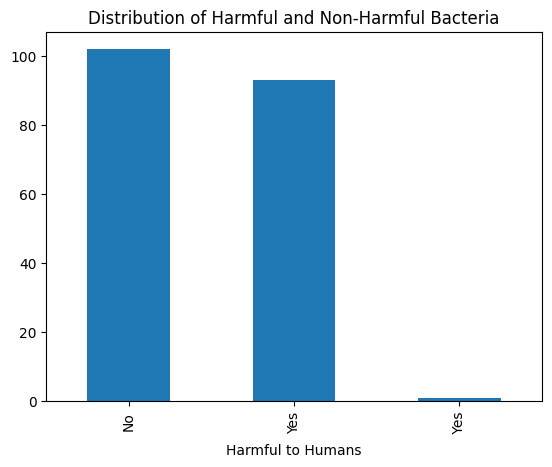

Skipping correlation heatmap because the values are identical.


<Figure size 1000x800 with 0 Axes>

In [9]:
# Overview of basic statistics
print("\nStatistical Summary:\n", df.describe(include='all'))

# Distribution of harmful vs non-harmful bacteria
df['Harmful to Humans'].value_counts().plot(kind='bar', title='Distribution of Harmful and Non-Harmful Bacteria')
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Check if correlation matrix is valid
if correlation_matrix.nunique().max() > 1:
    plt.title("Feature Correlation Heatmap")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
    plt.colorbar()
    plt.show()
else:
    print("Skipping correlation heatmap because the values are identical.")

# 5. **Feature Preparation**

In [10]:
# Convert categorical data into numbers using label encoding
encoder_family = LabelEncoder()
encoder_location = LabelEncoder()
encoder_harmful = LabelEncoder()

df['Family_encoded'] = encoder_family.fit_transform(df['Family'])
df['Location_encoded'] = encoder_location.fit_transform(df['Where Found'])
df['Harmful_encoded'] = encoder_harmful.fit_transform(df['Harmful to Humans'])

# Define features (X) and labels (y)
X = df[['Family_encoded', 'Location_encoded']]
y = df['Harmful_encoded']

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. **Model Building**

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# 7. **Model Testing**


Model Accuracy: 0.54


Performance Report:
               precision    recall  f1-score   support

         Yes       0.00      0.00      0.00         1
          No       0.57      0.55      0.56        31
         Yes       0.52      0.56      0.54        27

    accuracy                           0.54        59
   macro avg       0.36      0.37      0.36        59
weighted avg       0.53      0.54      0.54        59



C:\Users\ZCMC IHOMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ZCMC IHOMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ZCMC IHOMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

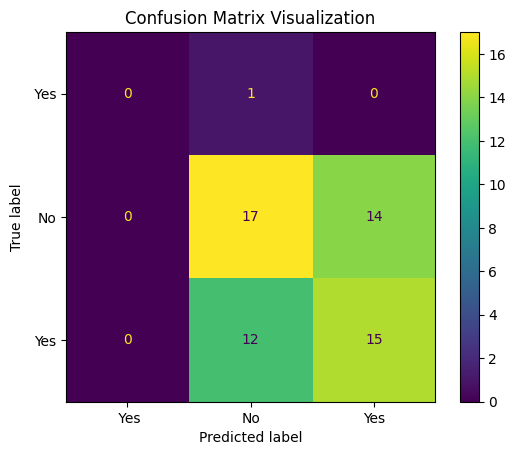

In [12]:
# Generate predictions using the test set
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}\n")

# Display a detailed report of model performance
print("\nPerformance Report:\n", classification_report(y_test, y_pred, target_names=encoder_harmful.classes_, zero_division=0))


# Display confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder_harmful.classes_)
plt.title("Confusion Matrix Visualization")
plt.show()
